In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json
import seaborn as sns

data=pd.read_csv("Trending_YouTube_Video_Statistics/USvideos.csv")
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [244]:
# 描述  我们暂时先不进行分析，所以删除这一列
data = data.drop('description',axis=1)

In [245]:
# 去掉重复值
data = data.drop_duplicates()
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False


In [246]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


D:\ana\installl\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


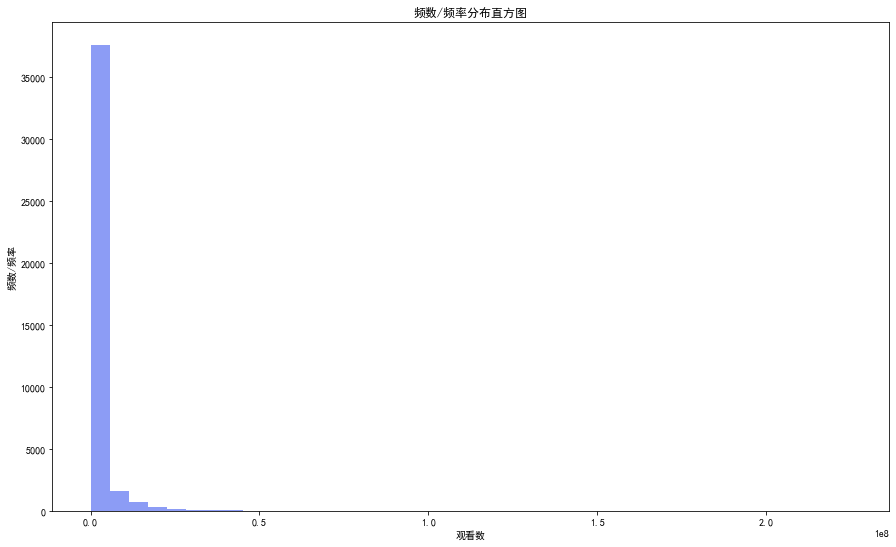

In [247]:
# 异常值  直方图
# 设置matplotlib正常显示中文和负号
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

plt.figure(figsize=(15,9))
plt.hist(data['views'], bins=40, normed=0, facecolor="#5C73F2", alpha=0.7)
# 显示横轴标签
plt.xlabel("观看数")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

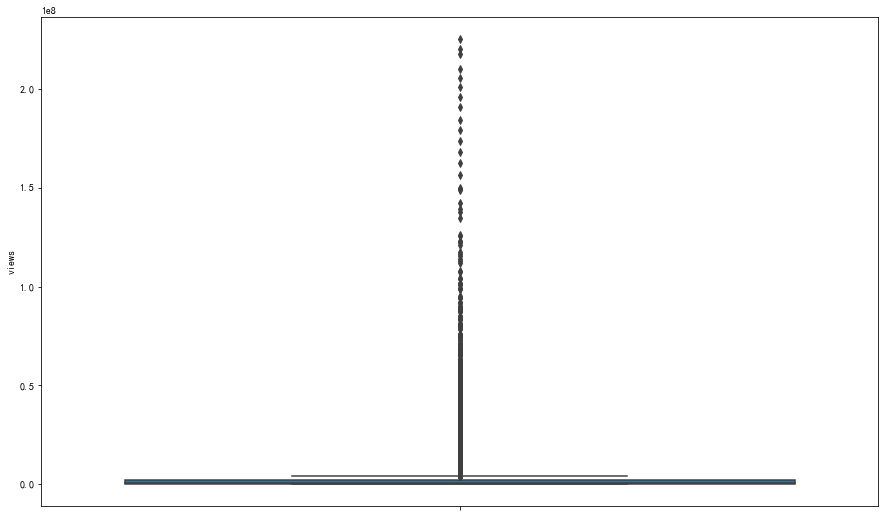

In [248]:
# 异常值  箱型图
plt.figure(figsize=(15,9))
sns.boxplot(y=data['views'],data=data)

In [249]:
# 时间格式处理
data['publish_time'] = pd.to_datetime(data['publish_time'],format="%Y-%m-%dT%H:%M:%S.%fZ")
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_time'] = data['publish_time'].dt.date
data['publish_time'] = pd.to_datetime(data['publish_time'])
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,7
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,18


In [250]:
data['trending_date'] = pd.to_datetime(data['trending_date'],format="%y.%d.%m")
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,18


In [251]:
# 分类字段处理
id_to_category = {}
with open("Trending_YouTube_Video_Statistics/US_category_id.json","r") as f:
    a = json.load(f)
    for category in a['items']:
        id_to_category[category['id']] = category['snippet']['title']
data['category_id'] = data['category_id'].astype('str')
data['category'] = data['category_id'].map(id_to_category)
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,17,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,19,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,11,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,18,Entertainment


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40901 non-null  object        
 1   trending_date           40901 non-null  datetime64[ns]
 2   title                   40901 non-null  object        
 3   channel_title           40901 non-null  object        
 4   category_id             40901 non-null  object        
 5   publish_time            40901 non-null  datetime64[ns]
 6   tags                    40901 non-null  object        
 7   views                   40901 non-null  int64         
 8   likes                   40901 non-null  int64         
 9   dislikes                40901 non-null  int64         
 10  comment_count           40901 non-null  int64         
 11  thumbnail_link          40901 non-null  object        
 12  comments_disabled       40901 non-null  bool  

In [253]:
data.isnull().sum() # 没有空值

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
publish_hour              0
category                  0
dtype: int64

### 数据分析

因为同一视频存在不同的上榜时间，所以会有重复的记录，后面分析的时候考虑去重

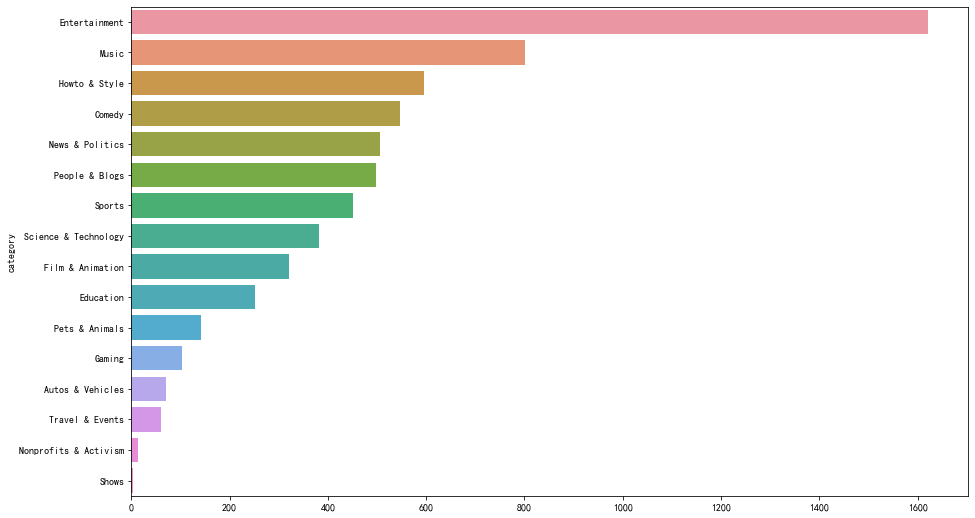

In [254]:
# 不同类型电影的统计量
c_v_df = data.groupby('category').apply(lambda x:x['video_id'].drop_duplicates().count()).sort_values(ascending=False)
# 条形图
plt.figure(figsize=(15,9))
sns.barplot(x=c_v_df.values,y=c_v_df.index,orient='h')

### 分析：
**娱乐，音乐类型包含的视频量较高**

动物类，游戏类，旅游和故事类，表演类包含的视频量相对较低

In [255]:
# 各类别观看数最多，并找出video_id
c_v_c = pd.DataFrame(data.groupby(['category','video_id'])['views'].sum()).reset_index()
c_v_c_max = c_v_c.iloc[c_v_c.groupby('category').apply(lambda x:x['views'].idxmax())].sort_values(by="views",ascending=False)
c_v_c_max

,category,video_id,views
3920,Music,VYOjWnS4cMY,3758488765
2356,Entertainment,u9Mv98Gr5pY,1003151226
2781,Film & Animation,ulNswX3If6U,818792483
5846,Science & Technology,yDiXQl7grPQ,541697957
4934,People & Blogs,BhIEIO0vaBE,461064419
2896,Gaming,oSEeK9yDNQI,290441864
6157,Sports,df7PZIVe1lw,276952020
3218,Howto & Style,WyZz9muaKFc,265680950
130,Comedy,4kDklB6-69Q,239794932
4742,News & Politics,qfqVkEYQ1Ls,162840629


Text(0.5, 1.0, '不同类别视频最大播放量')

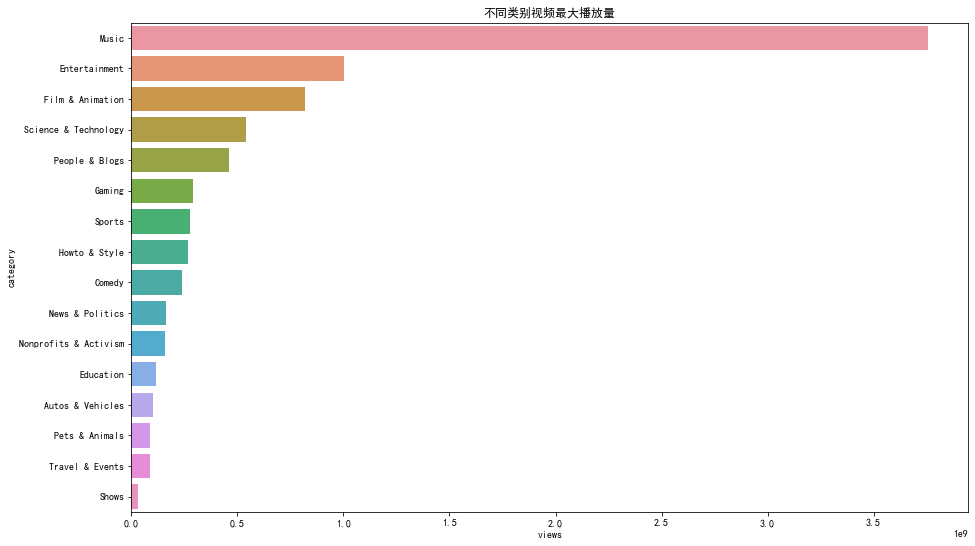

In [256]:
plt.figure(figsize=(15,9))
sns.barplot(x='views',y='category',data=c_v_c_max,orient='h')
plt.title('不同类别视频最大播放量')

### 分析
**我们也可以知道每个类别观看数最高的视频**

音乐类播放量最高的视频的播放量远高于其他类

**音乐，娱乐，电影类型的视频观看量较高**

Text(0.5, 1.0, '不同类别视频播放总量')

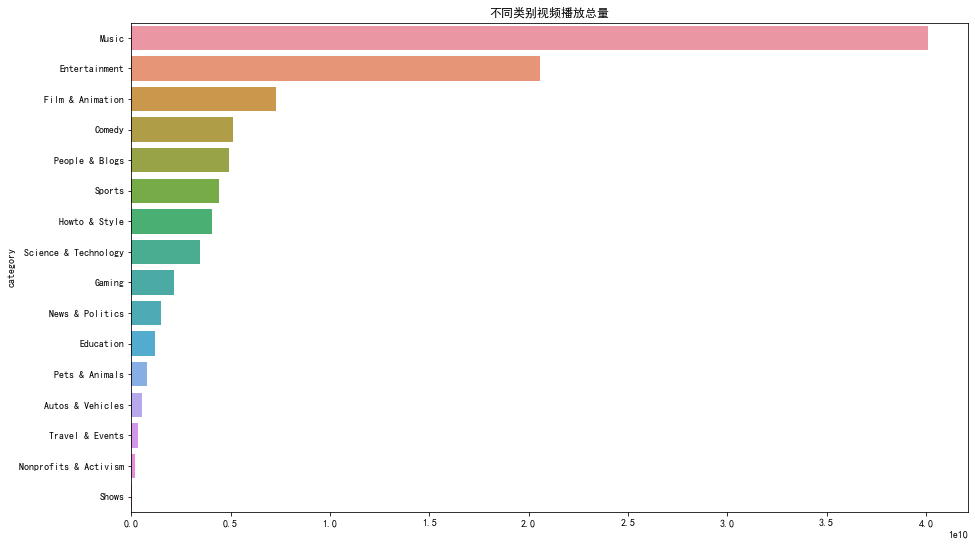

In [257]:
c_v_sum = data.groupby('category')['views'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,9))
sns.barplot(x=c_v_sum.values,y=c_v_sum.index,orient='h')
plt.title('不同类别视频播放总量')

Text(0.5, 1.0, '不同类别视频平均播放量')

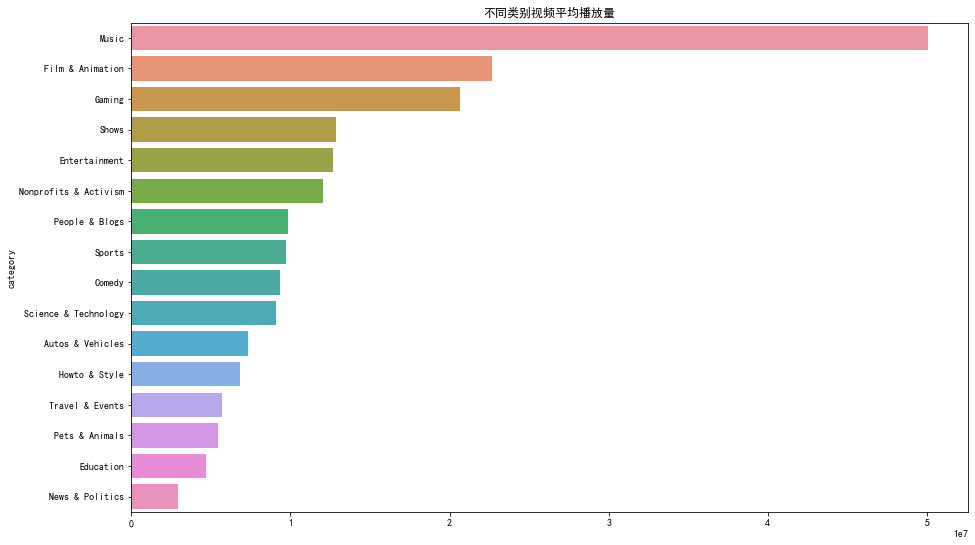

In [258]:
# 不同类别的平均观看量
def func(group):
    return (group['views'].sum())/(group['video_id'].drop_duplicates().count())
c_v_avg = data.groupby('category').apply(func).sort_values(ascending=False)

plt.figure(figsize=(15,9))
sns.barplot(x=c_v_avg.values,y=c_v_avg.index,orient='h')
plt.title('不同类别视频平均播放量')

### 分析
**音乐，电影类型的视频平均观看数较高，娱乐排第五名**

游戏的播放量居于中间位置，但是平均播放量在前排

旅游，教育，动物，新闻类的视频无论是播放总量还是平均播放量都较低

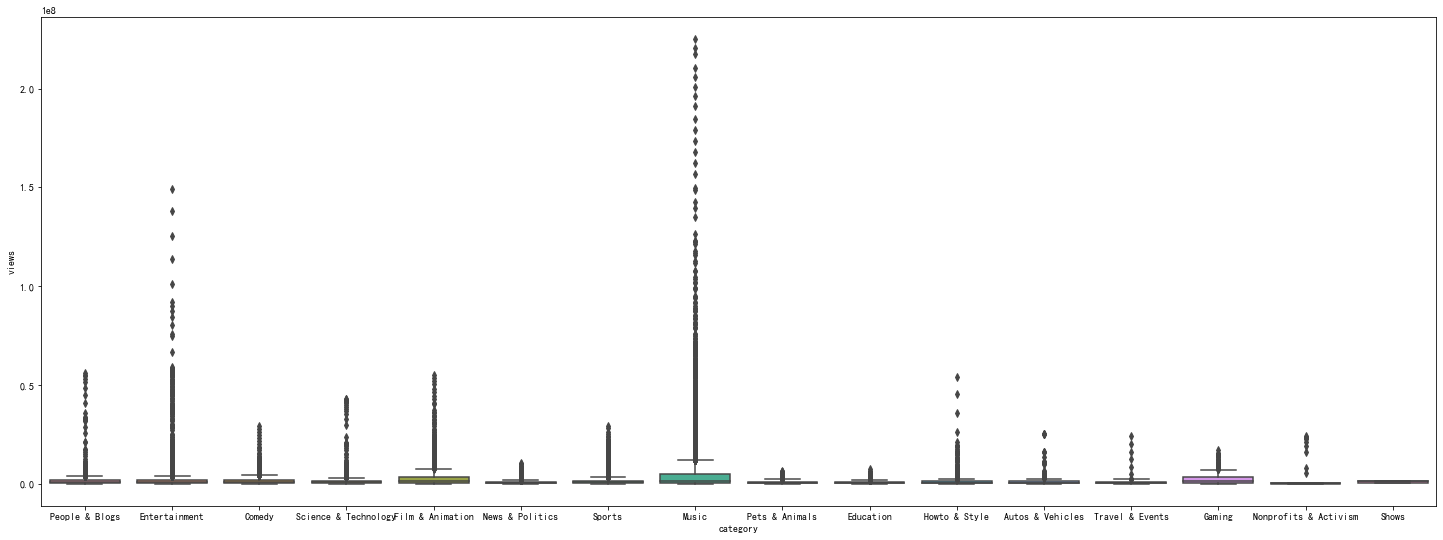

In [259]:
# 不同类别观看量箱型图比较
plt.figure(figsize=(25,9))
sns.boxplot(x='category',y='views',data=data)

In [260]:
# 所有类别观看量最大的，并找出其video_id
c_v_c.iloc[c_v_c['views'].idxmax()]

category          Music
video_id    VYOjWnS4cMY
views        3758488765
Name: 3920, dtype: object

Text(0.5, 1.0, '各类型视频上榜次数对比')

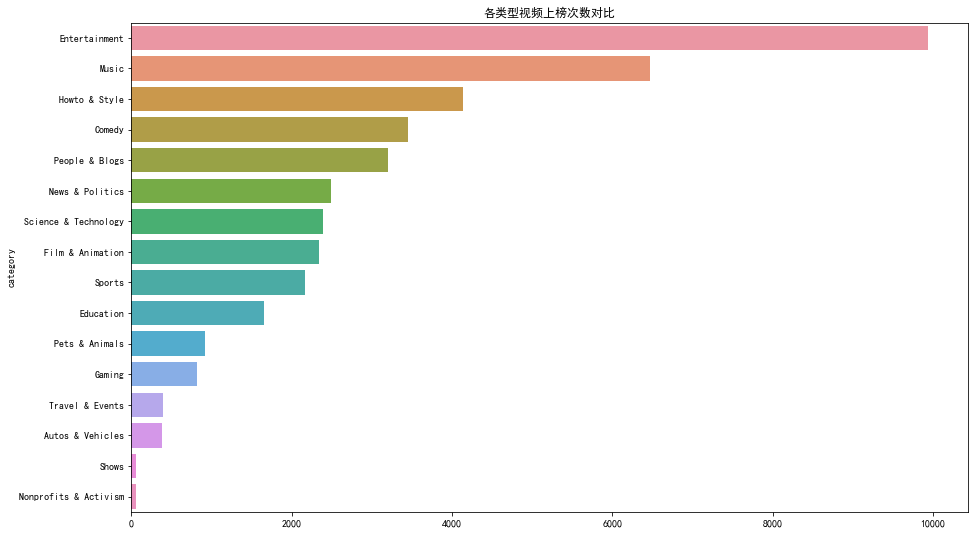

In [262]:
# 什么类型的视频上榜的次数最多,同一视频有多次上榜
c_v_trend = data.groupby(['category','video_id']).size().reset_index().rename(columns={0:'nums'})
c_v_trend_nums = c_v_trend.groupby('category')['nums'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,9))
sns.barplot(x=c_v_trend_nums.values,y=c_v_trend_nums.index,orient='h')
plt.title('各类型视频上榜次数对比')

### 分析
娱乐和音乐类型的视频上榜次数较多，电影类型视频上榜次数居中

Text(0.5, 1.0, '不同类别视频上榜次数的比较')

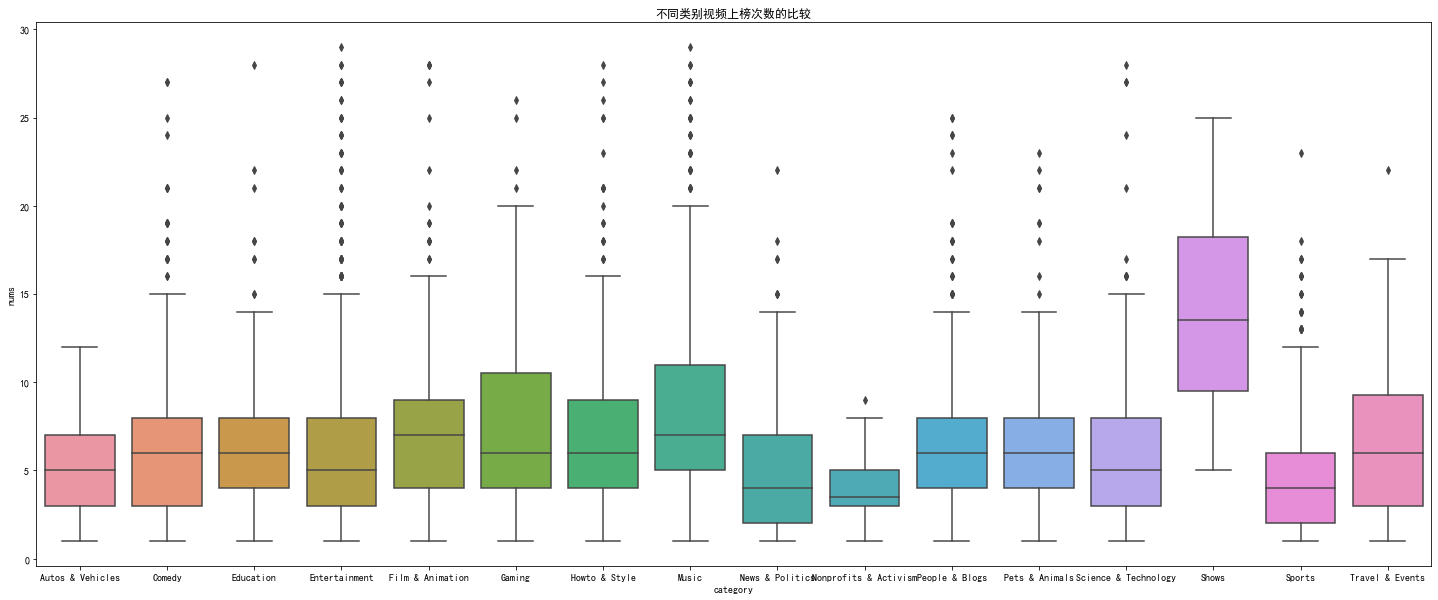

In [263]:
# 不同类别视频上榜次数的比较
plt.figure(figsize=(25,10))
sns.boxplot(x='category',y='nums',data=c_v_trend)
plt.title('不同类别视频上榜次数的比较')

### 分析
无论是总体来看还是分类别查看，绝大多数视频的上榜次数都集中在4-6次。

但同时也存在不少离群点，说明仍有一定数量的视频能反复十余次甚至二十余次上榜。

类别shows，结合前文来看，虽然只有4支视频登上trending榜单，但上榜的平均次数反倒是最多的。

### 分析

1.针对我们要拍什么类型的视频，视频定位

- 视频观看量前三的视频类型为音乐，娱乐，电影

- 音乐，电影和娱乐等类型观看量相对较高，观看率也相对较高，这三种类型可以选择

In [ ]:
# 频道视频总量(稍后分析)
c_v_df1 = data.groupby('channel_title')['video_id'].size().reset_index().rename(columns = {'video_id':'c_v_count'}).sort_values(by='c_v_count',ascending=False)[:30]
c_v_df1

In [20]:
from pyecharts import options as opts
from pyecharts.charts import TreeMap



tree_data = []
for key,value in dict(zip(c_v_df1['channel_title'],c_v_df1['c_v_count'])).items():
    tree_data_o = {}
    tree_data_o["value"] = value
    tree_data_o["name"] = key
    tree_data.append(tree_data_o)

c = (
    TreeMap()
    .add("各频道观看数",tree_data)
    .set_global_opts(title_opts=opts.TitleOpts(title="各频道观看数"))
    .render("treemap_base.html")
)

D:\ana\installl\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [21]:
# 各频道视频的观看量最大,并找出其video_id
c_v_v = pd.DataFrame(data.groupby(['channel_title','video_id'])['views'].sum()).reset_index()
c_v_v.iloc[c_v_v.groupby('channel_title').apply(lambda x:x['views'].idxmax())]

,channel_title,video_id,views
0,12 News,9KIP-Ncp2jU,177970
3,1MILLION Dance Studio,XKl8Wg25DrM,9631180
5,1theK (원더케이),F4qfN5UeFvQ,41591927
11,20th Century Fox,6S9c5nnDd_s,333496610
27,2CELLOS,ozkqm2ifMw8,432186
...,...,...,...
6359,ワーナー ブラザース 公式チャンネル,QF031DwMffQ,7389323
6360,圧倒的不審者の極み!,MeNR0guNn70,11417717
6361,杰威爾音樂 JVR Music,MAjY8mCTXWk,399614335
6362,郭韋辰,smRlXuBcp3c,26964


In [22]:
# 所有频道视频的观看量最大,并找出其video_id
c_v_v.iloc[c_v_v['views'].idxmax()]

channel_title    ChildishGambinoVEVO
video_id                 VYOjWnS4cMY
views                     3758488765
Name: 1014, dtype: object

In [25]:
# 按照类别，频道分组
data[data['video_id']=='yq4mgb1PDTI']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour,category
15688,yq4mgb1PDTI,2018-02-02,1980 toyota corolla liftback commercial,Amarullah Rizky,2,2013-10-25,"Corolla Citytownvillage|""Dx""|""Ke70""|""Racing""|""...",10186,39,0,0,https://i.ytimg.com/vi/yq4mgb1PDTI/default.jpg,False,False,False,2,Autos & Vehicles
15927,yq4mgb1PDTI,2018-02-03,1980 toyota corolla liftback commercial,Amarullah Rizky,2,2013-10-25,"Corolla Citytownvillage|""Dx""|""Ke70""|""Racing""|""...",10270,39,0,0,https://i.ytimg.com/vi/yq4mgb1PDTI/default.jpg,False,False,False,2,Autos & Vehicles
16147,yq4mgb1PDTI,2018-02-04,1980 toyota corolla liftback commercial,Amarullah Rizky,2,2013-10-25,"Corolla Citytownvillage|""Dx""|""Ke70""|""Racing""|""...",10345,39,0,0,https://i.ytimg.com/vi/yq4mgb1PDTI/default.jpg,False,False,False,2,Autos & Vehicles


In [98]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,17,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,19,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,11,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,18,Entertainment


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40901 non-null  object        
 1   trending_date           40901 non-null  datetime64[ns]
 2   title                   40901 non-null  object        
 3   channel_title           40901 non-null  object        
 4   category_id             40901 non-null  object        
 5   publish_time            40901 non-null  datetime64[ns]
 6   tags                    40901 non-null  object        
 7   views                   40901 non-null  int64         
 8   likes                   40901 non-null  int64         
 9   dislikes                40901 non-null  int64         
 10  comment_count           40901 non-null  int64         
 11  thumbnail_link          40901 non-null  object        
 12  comments_disabled       40901 non-null  bool  

Text(0.5, 1.0, '视频发布量随时间的变化趋势')

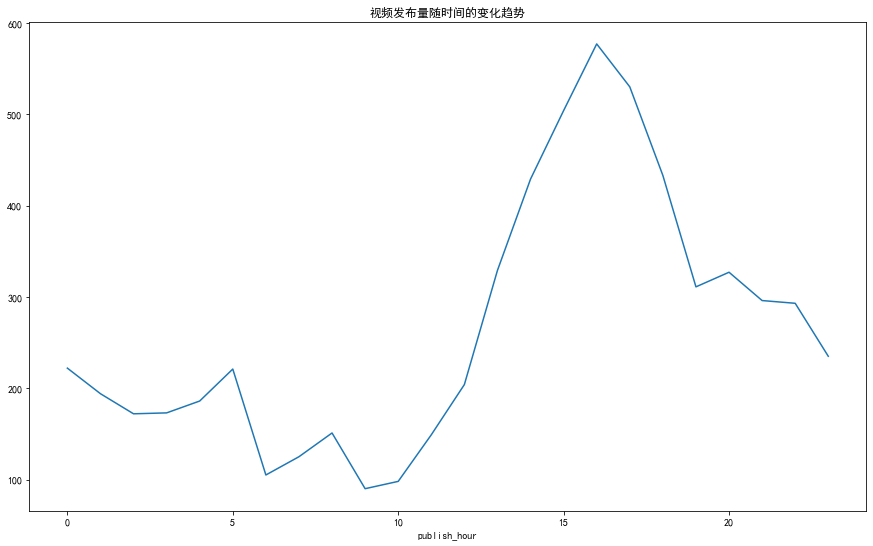

In [264]:
# 时间趋势
p_t_c = data.groupby(['publish_hour']).apply(lambda x:x['video_id'].drop_duplicates().count())

plt.figure(figsize=(15,9))
sns.lineplot(x=p_t_c.index,y=p_t_c.values)
plt.title('视频发布量随时间的变化趋势')

### 分析

下午16点左右是发布时视频量最高的时间，可能因为过几个小时下班，刷youtube的人数较多，观看量也会相对较高，所以我们考虑在16-18点发布视频

In [180]:
def func1(group):
    group['trend_gap'] = (group['trending_date'].max()-group['trending_date'].min())
    return group
data['trend_gap'] = data.sort_values(by='trending_date').groupby('video_id').apply(func1)['trend_gap'].dt.days
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour,category,pub_trend,time_cut,trend_gap
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,17,People & Blogs,1,0-1天,6
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,7,Entertainment,1,0-1天,6
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,19,Comedy,2,1-3天,6
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,11,Entertainment,1,0-1天,6
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,18,Entertainment,2,1-3天,5


4215


D:\ana\installl\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ana\installl\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0.5, 1.0, '视频发布与首次上榜的时间差的占比')

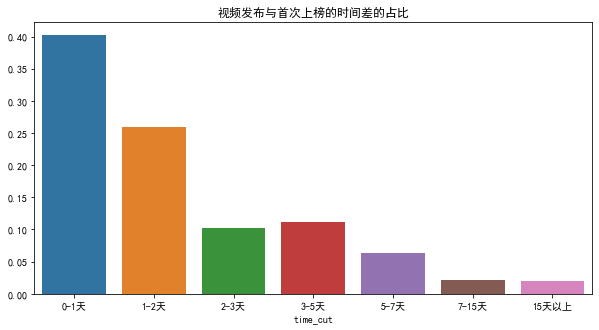

In [265]:
# 视频的发布时间与首次上榜时间之间的关系
# 视频发布与第一次上榜的时间差
def func2(group):
    return group['trending_date'].idxmin()
p_f_t = data.iloc[data.groupby('video_id').apply(func2)]
p_f_t['pub_trend_time'] = (p_f_t['trending_date']-p_f_t['publish_time']).dt.days
print(p_f_t['pub_trend_time'].max())

# 画图
p_f_t_bins = [0,1,2,3,5,7,15,4215]
p_f_t_label_name = ['0-1天','1-2天','2-3天','3-5天','5-7天','7-15天','15天以上']
p_f_t['time_cut'] = pd.cut(p_f_t['pub_trend_time'],p_f_t_bins,labels=p_f_t_label_name)

time_cut_p_f_t = p_f_t.groupby('time_cut').apply(lambda x:x['pub_trend_time'].count()/p_f_t['video_id'].count())
plt.figure(figsize=(10,5))
sns.barplot(x=time_cut_p_f_t.index,y=time_cut_p_f_t.values)
plt.title('视频发布与首次上榜的时间差的占比')

### 分析
发布视频之后，有70%多的视频会在3天内上榜;但是也有一些视频隔很长时间甚至4215天才会上榜，突然上榜。

Text(0.5, 1.0, '不同类别视频首次上榜时间的比较')

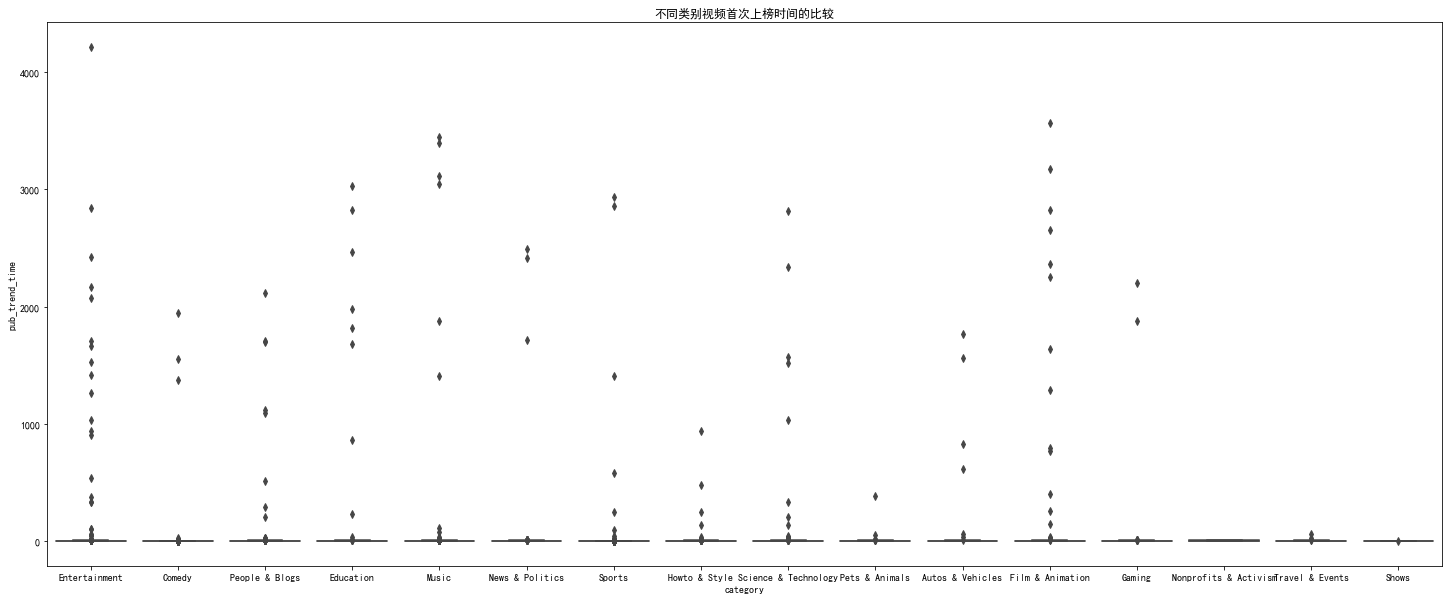

In [267]:
# 不同类别视频首次上榜时间的比较
plt.figure(figsize=(25,10))
sns.boxplot(x='category',y='pub_trend_time',data=p_f_t)
plt.title('不同类别视频首次上榜时间的比较')

### 分析
无论是总体来看还是分类别查看，绝大多数视频的上榜次数比较集中。

但同时也存在不少离群点，娱乐类视频最长的上榜时间竟然达到4000多天。

In [108]:
# 视频发布与上榜的时间差？不同类别之间有区别吗？哪个时间差的观看量最高（以下分析的并不严谨）
data['pub_trend'] = (data['trending_date'] - data['publish_time']).dt.days
bins = [0,1,3,5,7,15,5000]
labels_name = ['0-1天','1-3天','3-5天','5-7天','7-15天','15天以上']
data['time_cut'] = pd.cut(data['pub_trend'],bins,labels=labels_name)
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour,category,pub_trend,time_cut
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,17,People & Blogs,1,0-1天
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,7,Entertainment,1,0-1天
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,19,Comedy,2,1-3天
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,11,Entertainment,1,0-1天
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,18,Entertainment,2,1-3天


In [ ]:
# 

In [110]:
data.count()

video_id                  40901
trending_date             40901
title                     40901
channel_title             40901
category_id               40901
publish_time              40901
tags                      40901
views                     40901
likes                     40901
dislikes                  40901
comment_count             40901
thumbnail_link            40901
comments_disabled         40901
ratings_disabled          40901
video_error_or_removed    40901
publish_hour              40901
category                  40901
pub_trend                 40901
time_cut                  40780
dtype: int64

Text(0.5, 1.0, '视频发布与上榜的时间差的占比')

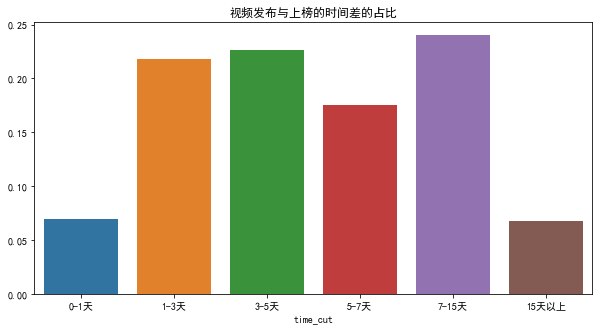

In [112]:
#画图
time_cut_df = data.groupby('time_cut').apply(lambda x:x['pub_trend'].count()/data['video_id'].count())
plt.figure(figsize=(10,5))
sns.barplot(x=time_cut_df.index,y=time_cut_df.values)
plt.title('视频发布与上榜的时间差的占比')

### 分析
有70%左右的视频是在7天内上榜的，小于1天或者超过7天上榜的概率就相对较小了

Text(0.5, 1.0, '视频发布与上榜的时间差的观看量对比')

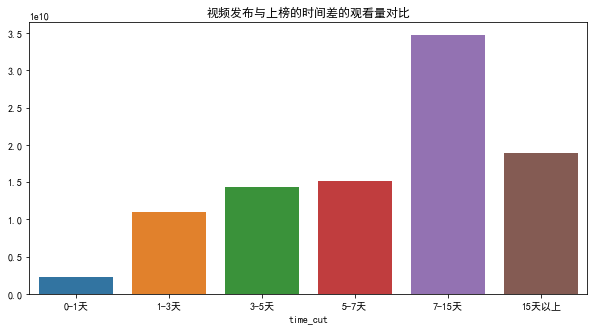

In [115]:
# 不同上榜时间差的观看量比较
time_cut_views = data.groupby('time_cut')['views'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=time_cut_views.index,y=time_cut_views.values)
plt.title('视频发布与上榜的时间差的观看量对比')

Text(0.5, 1.0, '不同上榜时间差的观看量的占比')

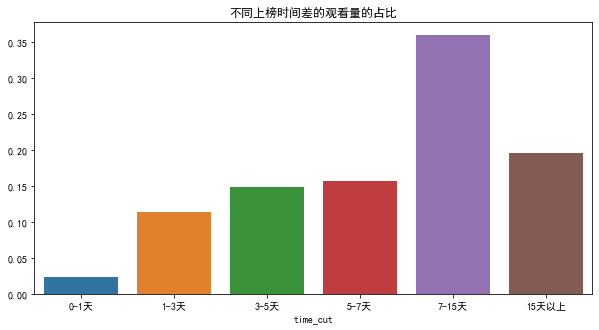

In [122]:
# 不同上榜时间差的观看量的占比
time_cut_views_rate = data.groupby('time_cut').apply(lambda x:x['views'].sum()/data['views'].sum())
plt.figure(figsize=(10,5))
sns.barplot(x=time_cut_views_rate.index,y=time_cut_views_rate.values)
plt.title('不同上榜时间差的观看量的占比')

### 分析
发布视频正在7天后，视频的播放量是最高的

In [268]:
# 视频的观看，喜欢，不喜欢，评论之间的转化，不同类别视频的转化率，不同视频的转化率
v_l_d_c = data[['video_id','category','views','likes','dislikes','comment_count']]
likes = v_l_d_c.groupby('category').apply(lambda x:x['likes'].sum())
dislikes = v_l_d_c.groupby('category').apply(lambda x:x['dislikes'].sum())
likes_rate = v_l_d_c.groupby('category').apply(lambda x:(x['likes'].sum())/(x['views'].sum())).reset_index().rename(columns={0:'likes_rate'})
dislikes_rate = v_l_d_c.groupby('category').apply(lambda x:(x['dislikes'].sum())/(x['views'].sum())).reset_index().rename(columns={0:'dislikes_rate'})
comment_rate = v_l_d_c.groupby('category').apply(lambda x:(x['comment_count'].sum())/(x['views'].sum())).reset_index().rename(columns={0:'comment_rate'})
inversion = pd.merge(pd.merge(likes_rate,dislikes_rate,on='category'),comment_rate,on='category')
inversion

,category,likes_rate,dislikes_rate,comment_rate
0,Autos & Vehicles,0.008154,0.000467,0.001507
1,Comedy,0.042286,0.001413,0.004401
2,Education,0.041729,0.001145,0.004610
3,Entertainment,0.025740,0.002087,0.003572
4,Film & Animation,0.022786,0.000835,0.002460
5,Gaming,0.032324,0.004306,0.006918
6,Howto & Style,0.039920,0.001342,0.005673
7,Music,0.035303,0.001275,0.003122
8,News & Politics,0.012312,0.002837,0.004098
9,Nonprofits & Activism,0.087697,0.019595,0.028464


Text(0.5, 1.0, '不同类别视频的喜欢量')

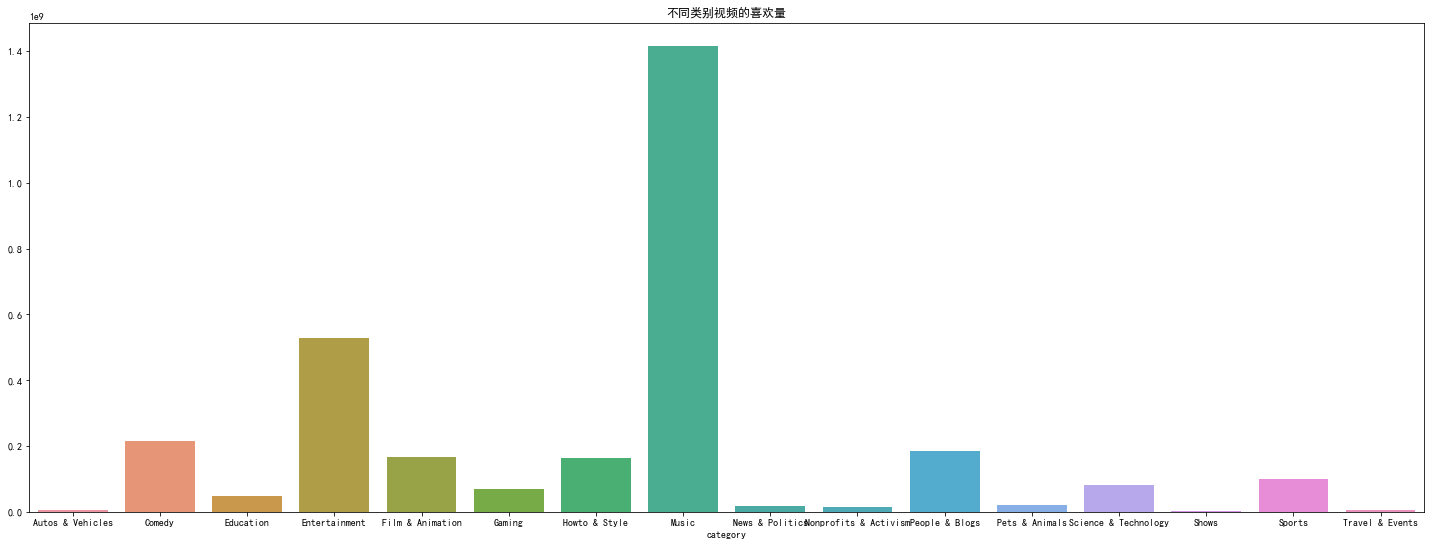

In [269]:
# 画图
plt.figure(figsize=(25,9))
sns.barplot(x=likes.index,y=likes.values)
plt.title('不同类别视频的喜欢量')

Text(0.5, 1.0, '不同类别视频的不喜欢量')

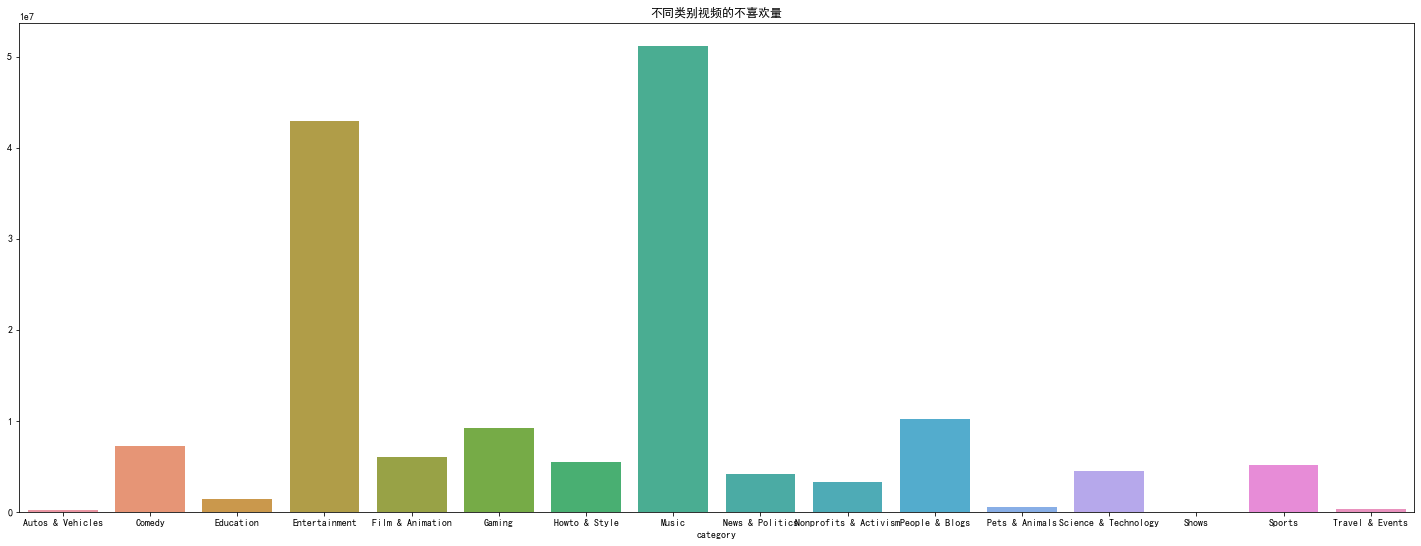

In [270]:
# 画图
plt.figure(figsize=(25,9))
sns.barplot(x=dislikes.index,y=dislikes.values)
plt.title('不同类别视频的不喜欢量')

Text(0.5, 1.0, '由观看到喜欢的转化率')

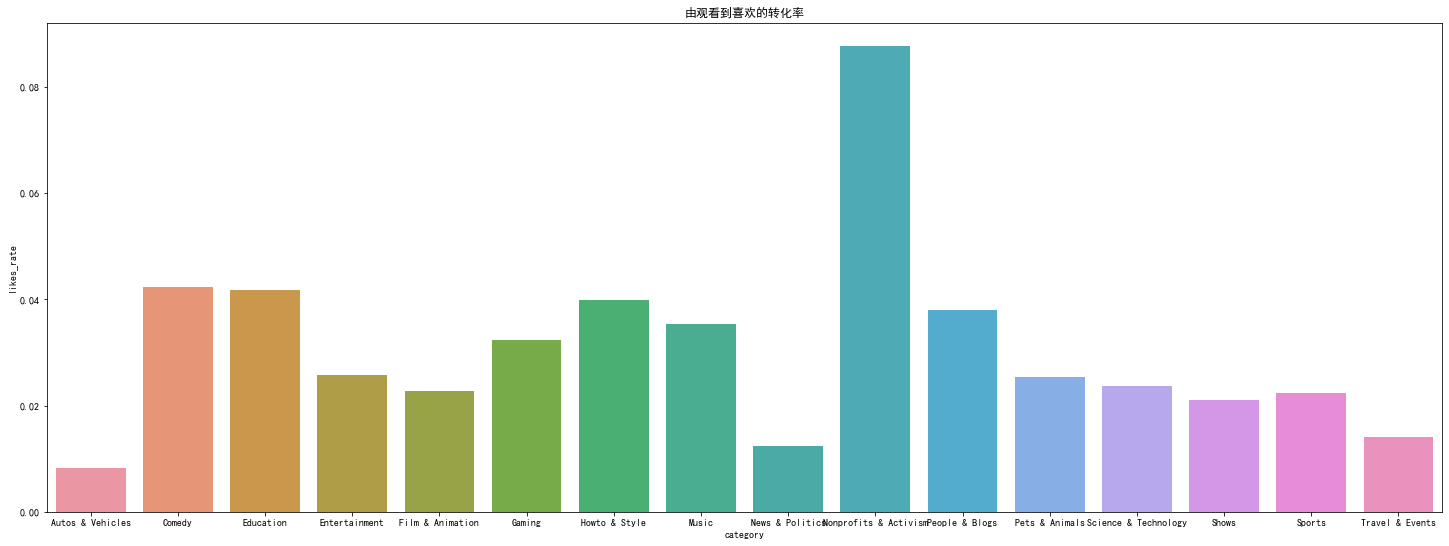

In [236]:
# 画图
plt.figure(figsize=(25,9))
sns.barplot(x='category',y='likes_rate',data=inversion)
plt.title('由观看到喜欢的转化率')

Text(0.5, 1.0, '由观看到不喜欢的转化率')

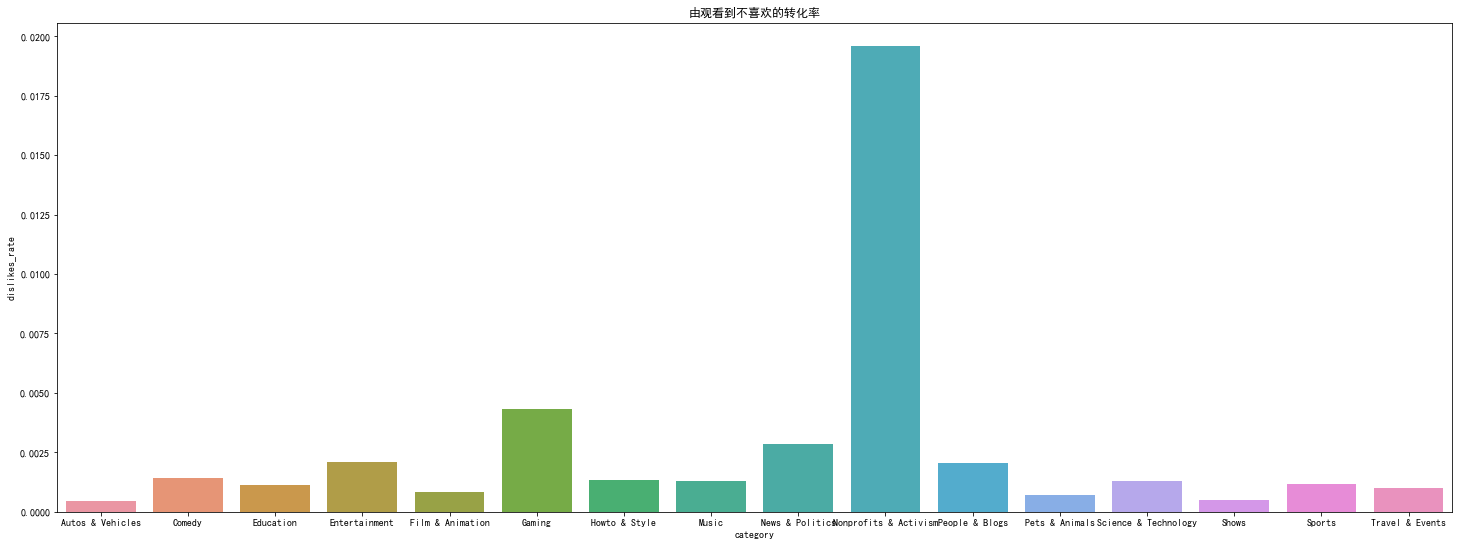

In [241]:
# 画图
plt.figure(figsize=(25,9))
sns.barplot(x='category',y='dislikes_rate',data=inversion)
plt.title('由观看到不喜欢的转化率')

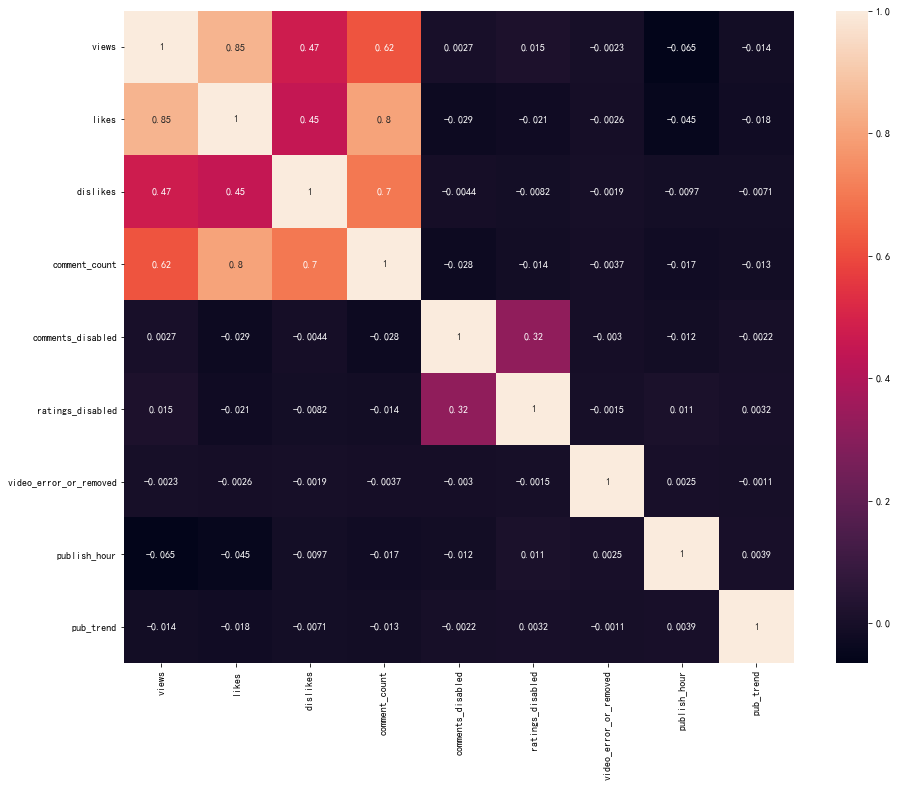

In [116]:
# 观看、喜欢、不喜欢、评论之间的关系
corr = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)

### 分析

从图像上看，负数基本上都在-0.01左右，所以没有出现明显的负相关

颜色越浅表示有明显的正相关，观看和喜欢之间，喜欢和评论数之间有明显的正相关。

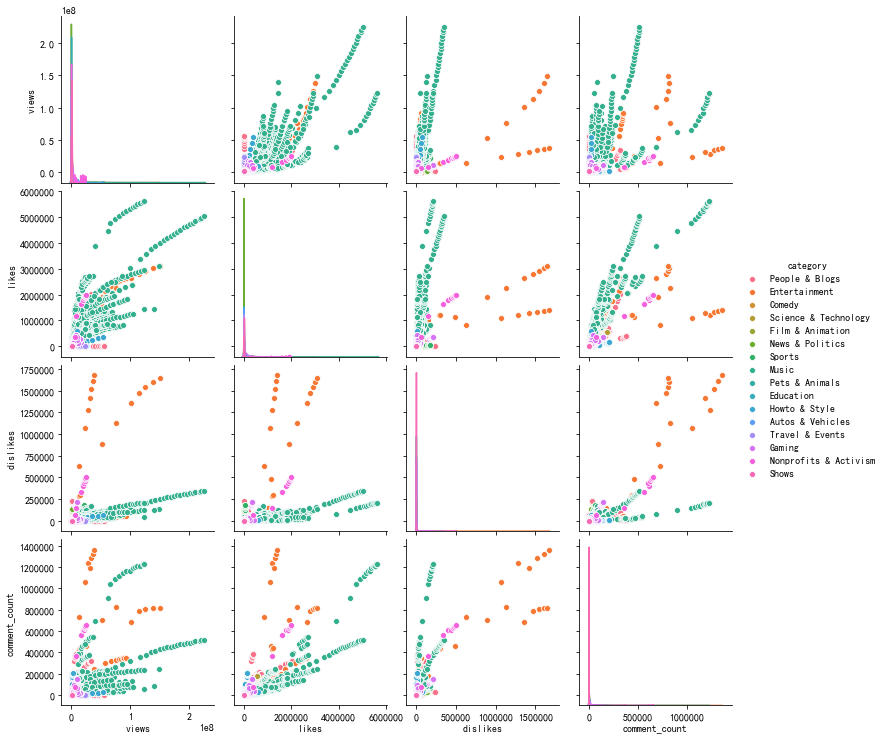

In [117]:
sample = data[['views','likes','dislikes','comment_count','category']]
sns.pairplot(sample,hue='category')